In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [86]:
wine = pd.read_csv('/content/drive/MyDrive/Courses/Applied probability and statistics/winequality-white1.csv')

In [87]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#Regression analysis

Linear regression - statsmodels

In [88]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.024646,0.289187,0.085507,0.022637,-0.049054,0.090562,0.267149,-0.426307,-0.017073,-0.120509,-0.113815
volatile acidity,-0.024646,1.000000,-0.153252,0.048092,0.068989,-0.095256,0.088809,0.005232,-0.033891,-0.038169,0.067025,-0.195887
citric acid,0.289187,-0.153252,1.000000,0.091678,0.113928,0.094870,0.121152,0.148213,-0.164514,0.061432,-0.076494,-0.009251
residual sugar,0.085507,0.048092,0.091678,1.000000,0.086604,0.309004,0.406316,0.832089,-0.200717,-0.029487,-0.459165,-0.100114
chlorides,0.022637,0.068989,0.113928,0.086604,1.000000,0.101865,0.198732,0.260250,-0.090793,0.016442,-0.360501,-0.210031
free sulfur dioxide,-0.049054,-0.095256,0.094870,0.309004,0.101865,1.000000,0.615952,0.308375,-0.000182,0.059831,-0.249987,0.008207
total sulfur dioxide,0.090562,0.088809,0.121152,0.406316,0.198732,0.615952,1.000000,0.542482,0.002275,0.134821,-0.448792,-0.174835
density,0.267149,0.005232,0.148213,0.832089,0.260250,0.308375,0.542482,1.000000,-0.100108,0.073457,-0.804152,-0.317232
pH,-0.426307,-0.033891,-0.164514,-0.200717,-0.090793,-0.000182,0.002275,-0.100108,1.000000,0.155482,0.121108,0.099424
sulphates,-0.017073,-0.038169,0.061432,-0.029487,0.016442,0.059831,0.134821,0.073457,0.155482,1.000000,-0.018344,0.053710


In [89]:
X=wine.loc[:, wine.columns == 'residual sugar']
y=wine.loc[:, wine.columns == 'density']

In [90]:
X

,residual sugar
0,20.7
1,1.6
2,6.9
3,8.5
4,8.5
...,...
4890,1.6
4891,8.0
4892,1.2
4893,1.1


In [91]:
#y=(y-y.min())/(y.max()-y.min())

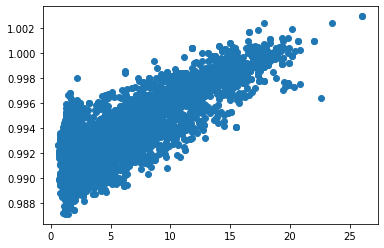

In [92]:
plt.scatter(X, y)

In [93]:
df=pd.concat((X,y), axis=1)

In [94]:
df

,residual sugar,density
0,20.7,1.00100
1,1.6,0.99400
2,6.9,0.99510
3,8.5,0.99560
4,8.5,0.99560
...,...,...
4890,1.6,0.99114
4891,8.0,0.99490
4892,1.2,0.99254
4893,1.1,0.98869


In [95]:
Result1 = smf.ols('y ~ X', df).fit()

print(Result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 1.101e+04
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:45   Log-Likelihood:                 24536.
No. Observations:                4895   AIC:                        -4.907e+04
Df Residuals:                    4893   BIC:                        -4.906e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9909   3.74e-05   2.65e+04      0.0

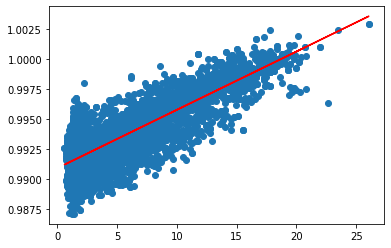

In [96]:
plt.scatter(X, y)
plt.plot(X, Result1.fittedvalues, color='r')
plt.show()

Linear Regression - sklearn

In [97]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [98]:
k = reg.coef_
n = reg.intercept_

print(k)
print(n)

[[0.00048551]]
[0.99091935]


In [99]:
y_predict = k*X + n

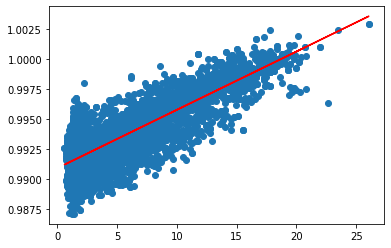

In [100]:
plt.scatter(X,y)
plt.plot(X,y_predict, color='red')

In [101]:
reg.predict(np.array([[15]]))

array([[0.99820198]])

Multiple regression - statsmodels

In [102]:
X1=wine.loc[:, wine.columns != 'density']

In [103]:
X1=sm.add_constant(X1)
X1

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,1.0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,1.0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,1.0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,1.0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4890,1.0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,6
4891,1.0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,5
4892,1.0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,6
4893,1.0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,7


In [104]:
Result2 = sm.OLS(y, X1).fit()
#Result2 = smf.ols('density ~ X1', wine).fit()

print(Result2.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.792e+04
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:49   Log-Likelihood:                 30762.
No. Observations:                4895   AIC:                        -6.150e+04
Df Residuals:                    4883   BIC:                        -6.142e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9870 

Multiple regression (two features dependence) - statsmodels

In [105]:
Result3 = smf.ols("density ~ pH + alcohol", wine).fit()
print(Result3.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     4477.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:49   Log-Likelihood:                 24197.
No. Observations:                4895   AIC:                        -4.839e+04
Df Residuals:                    4892   BIC:                        -4.837e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0141      0.001   1869.890      0.0

Multiple regression (two features interaction) - statsmodels

In [106]:
Result4 = smf.ols('density ~ pH * alcohol', wine).fit()

print(Result4.summary())

                            OLS Regression Results                            
Dep. Variable:                density   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2986.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:49   Log-Likelihood:                 24198.
No. Observations:                4895   AIC:                        -4.839e+04
Df Residuals:                    4891   BIC:                        -4.836e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0217      0.005    213.820      0.0

Polynomial regression - statsmodels

In [107]:
Result5 = smf.ols('y ~ X+I(X**2)+I(X**3)', df).fit()

print(Result5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     3755.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:19:50   Log-Likelihood:                 24575.
No. Observations:                4895   AIC:                        -4.914e+04
Df Residuals:                    4891   BIC:                        -4.912e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9914    7.2e-05   1.38e+04      0.0

#Estimation of the parameters of distributions of single variables

In [108]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000,4895.000000
mean,6.854168,0.278080,0.334159,6.368979,0.045764,35.313790,138.340858,0.994012,3.188241,0.489851,10.514725,5.877835
std,0.843754,0.100341,0.120992,4.975960,0.021850,17.007868,42.503148,0.002903,0.151017,0.114103,1.230393,0.885905
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991720,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993730,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,26.050000,0.346000,289.000000,440.000000,1.002950,3.820000,1.080000,14.200000,9.000000


In [109]:
wine.quantile(0.66)

fixed acidity             7.1000
volatile acidity          0.3000
citric acid               0.3600
residual sugar            7.9000
chlorides                 0.0470
free sulfur dioxide      41.0000
total sulfur dioxide    154.0400
density                   0.9953
pH                        3.2400
sulphates                 0.5200
alcohol                  11.0000
quality                   6.0000
Name: 0.66, dtype: float64

In [110]:
wine.var()

fixed acidity              0.711921
volatile acidity           0.010068
citric acid                0.014639
residual sugar            24.760177
chlorides                  0.000477
free sulfur dioxide      289.267576
total sulfur dioxide    1806.517578
density                    0.000008
pH                         0.022806
sulphates                  0.013020
alcohol                    1.513867
quality                    0.784827
dtype: float64

Variance measures how far each number in the set is from the mean and thus from every other number in the set

#Estimation of the parameters of the joint distributions (covariance, correlation coefficient)

In [111]:
wine.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,0.711921,-0.002087,0.029522,0.359000,0.000417,-0.703944,3.247747,0.000654,-0.054321,-0.001644,-0.125106,-0.085075
volatile acidity,-0.002087,0.010068,-0.001861,0.024012,0.000151,-0.162563,0.378752,0.000002,-0.000514,-0.000437,0.008275,-0.017413
citric acid,0.029522,-0.001861,0.014639,0.055195,0.000301,0.195225,0.623028,0.000052,-0.003006,0.000848,-0.011388,-0.000992
residual sugar,0.359000,0.024012,0.055195,24.760177,0.009416,26.151190,85.933466,0.012021,-0.150830,-0.016742,-2.811188,-0.441326
chlorides,0.000417,0.000151,0.000301,0.009416,0.000477,0.037856,0.184565,0.000017,-0.000300,0.000041,-0.009692,-0.004066
free sulfur dioxide,-0.703944,-0.162563,0.195225,26.151190,0.037856,289.267576,445.264189,0.015228,-0.000467,0.116111,-5.231320,0.123651
total sulfur dioxide,3.247747,0.378752,0.623028,85.933466,0.184565,445.264189,1806.517578,0.066944,0.014599,0.653849,-23.469861,-6.583197
density,0.000654,0.000002,0.000052,0.012021,0.000017,0.015228,0.066944,0.000008,-0.000044,0.000024,-0.002873,-0.000816
pH,-0.054321,-0.000514,-0.003006,-0.150830,-0.000300,-0.000467,0.014599,-0.000044,0.022806,0.002679,0.022503,0.013302
sulphates,-0.001644,-0.000437,0.000848,-0.016742,0.000041,0.116111,0.653849,0.000024,0.002679,0.013020,-0.002575,0.005429


In [112]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.024646,0.289187,0.085507,0.022637,-0.049054,0.090562,0.267149,-0.426307,-0.017073,-0.120509,-0.113815
volatile acidity,-0.024646,1.000000,-0.153252,0.048092,0.068989,-0.095256,0.088809,0.005232,-0.033891,-0.038169,0.067025,-0.195887
citric acid,0.289187,-0.153252,1.000000,0.091678,0.113928,0.094870,0.121152,0.148213,-0.164514,0.061432,-0.076494,-0.009251
residual sugar,0.085507,0.048092,0.091678,1.000000,0.086604,0.309004,0.406316,0.832089,-0.200717,-0.029487,-0.459165,-0.100114
chlorides,0.022637,0.068989,0.113928,0.086604,1.000000,0.101865,0.198732,0.260250,-0.090793,0.016442,-0.360501,-0.210031
free sulfur dioxide,-0.049054,-0.095256,0.094870,0.309004,0.101865,1.000000,0.615952,0.308375,-0.000182,0.059831,-0.249987,0.008207
total sulfur dioxide,0.090562,0.088809,0.121152,0.406316,0.198732,0.615952,1.000000,0.542482,0.002275,0.134821,-0.448792,-0.174835
density,0.267149,0.005232,0.148213,0.832089,0.260250,0.308375,0.542482,1.000000,-0.100108,0.073457,-0.804152,-0.317232
pH,-0.426307,-0.033891,-0.164514,-0.200717,-0.090793,-0.000182,0.002275,-0.100108,1.000000,0.155482,0.121108,0.099424
sulphates,-0.017073,-0.038169,0.061432,-0.029487,0.016442,0.059831,0.134821,0.073457,0.155482,1.000000,-0.018344,0.053710


In [113]:
wine.cov()['density']['residual sugar']/(wine.std()['density']*wine.std()['residual sugar'])

0.8320887737605666

#Estimation of the unconditional and conditional probabilities

Unconditional probability

In [114]:
temp=wine.quality.value_counts().sort_index()
temp

3      20
4     163
5    1457
6    2195
7     880
8     175
9       5
Name: quality, dtype: int64

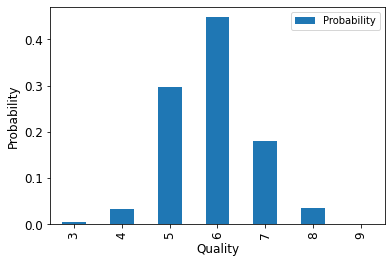

   Probability
3     0.004086
4     0.033299
5     0.297651
6     0.448417
7     0.179775
8     0.035751
9     0.001021
Probability    1.0
dtype: float64
Probability    0.448417
dtype: float64


In [115]:
P_quality = pd.DataFrame((temp/temp.sum()).sort_index())
P_quality.columns = ["Probability"]

P_quality.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("Quality",fontsize=12)
plt.show()
print(P_quality)
print(P_quality.sum())
print(P_quality.max())

Conditional probabilities

In [116]:
wine.pH.unique()

array([3.  , 3.3 , 3.26, 3.19, 3.18, 3.22, 2.99, 3.14, 3.54, 2.98, 3.25,
       3.24, 3.33, 3.12, 3.17, 3.47, 3.05, 3.42, 3.45, 3.38, 3.1 , 3.2 ,
       3.37, 3.13, 3.21, 3.11, 3.16, 3.27, 3.36, 3.35, 3.34, 3.32, 3.31,
       3.09, 3.03, 3.02, 3.15, 3.69, 2.95, 2.94, 3.39, 3.04, 2.89, 3.4 ,
       3.01, 3.63, 3.29, 3.23, 3.28, 3.06, 3.08, 2.87, 2.93, 3.44, 3.5 ,
       3.48, 3.72, 3.53, 3.52, 2.96, 3.61, 3.43, 3.49, 3.51, 3.46, 3.07,
       2.97, 3.41, 3.64, 3.56, 2.86, 2.88, 2.85, 3.58, 3.55, 3.66, 3.59,
       2.74, 2.92, 3.82, 3.81, 3.65, 2.9 , 3.77, 2.91, 3.62, 3.74, 2.8 ,
       3.6 , 2.72, 2.79, 3.57, 3.8 , 3.68, 2.77, 3.79, 3.7 , 2.84, 3.76,
       2.83, 3.75, 2.82, 3.67])

In [117]:
data_temp = (wine.pH<3).value_counts()
data_temp

False    4458
True      437
Name: pH, dtype: int64

In [118]:
data_temp1 = ((wine.pH>=3) & (wine.pH<=3.4)).value_counts()
data_temp1

True     4061
False     834
Name: pH, dtype: int64

In [119]:
data_temp2 = (wine.pH>3.4).value_counts()
data_temp2

False    4498
True      397
Name: pH, dtype: int64

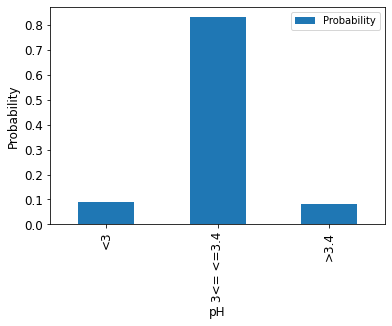

           Probability
<3            0.089275
3<= <=3.4     0.829622
>3.4          0.081103
Probability    1.0
dtype: float64
Probability    0.829622
dtype: float64


In [120]:
P_pH = pd.DataFrame([data_temp[True], data_temp1[True], data_temp2[True]])/len(wine)
P_pH.index = ["<3","3<= <=3.4",">3.4"]
P_pH.columns = ["Probability"]

P_pH.plot.bar(fontsize=12)
plt.ylabel("Probability",fontsize=12)
plt.xlabel("pH",fontsize=12)
plt.show()
print(P_pH)
print(P_pH.sum())
print(P_pH.max())

In [121]:
data_temp3 = ((wine.pH>=3) & (wine.pH<=3.4) & (wine.quality>=7)).value_counts()
data_temp3

False    4047
True      848
dtype: int64

In [124]:
len(data_temp1)

2

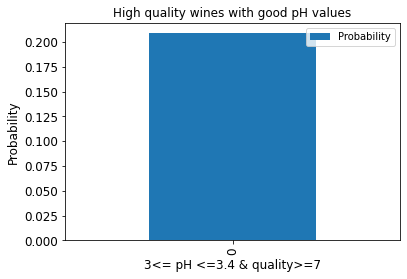

   Probability
0     0.208816
Probability    0.208816
dtype: float64
False    3835
True     1060
Name: quality, dtype: int64


In [125]:
P_pH_quality = pd.DataFrame([data_temp3[True]])/(data_temp1[True])
P_pH_quality.columns = ["Probability"]

P_pH_quality.plot.bar(fontsize=12)
plt.title("High quality wines with good pH values")
plt.ylabel("Probability",fontsize=12)
plt.xlabel("3<= pH <=3.4 & quality>=7",fontsize=12)
plt.show()
print(P_pH_quality)
print(P_pH_quality.sum())
print((wine.quality>=7).value_counts())

#Estimation of confidence intervals of certain parameters

In [60]:
mean_estimators = []

sample_size=500
number_of_mean_estimators=50
for x in range(number_of_mean_estimators):
    sample=wine['density'].sample(sample_size)
    mean_estimators.append(sample.values.mean())

In [61]:
alpha=0.05
std=wine['density'].std()

quantile_order=1-alpha/2
Quantile = stats.norm.ppf(quantile_order)
margin = Quantile * (std/sample_size**0.5)

In [62]:
confidence_interval = (mean_estimators[0] - margin, mean_estimators[0] + margin)
print(mean_estimators[0])
print(confidence_interval)

0.99386175
(0.9936072617909018, 0.9941162382090982)


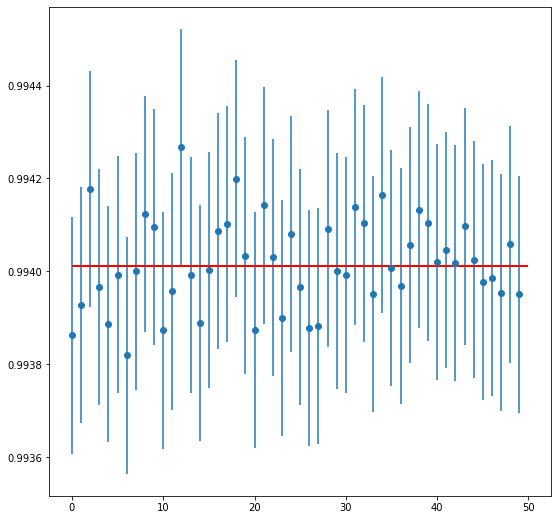

In [63]:
CIs=[]
for i in range(0,number_of_mean_estimators):
    CIs.append((mean_estimators[i] - margin, mean_estimators[i] + margin))

plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0, number_of_mean_estimators),
             y=mean_estimators[0:number_of_mean_estimators],
             yerr=[(up-down)/2 for up,down in CIs],
             fmt='o')

plt.hlines(xmin=0, xmax=number_of_mean_estimators,
           y=wine['density'].mean(),
           linewidth=2.0,
           color="red")

plt.show()